# Customer Segmentation using K-Means Cluster

### Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).
###### @wikipedia

#### Import all the Libraries

In [80]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Check the location of Jupyter Folder

In [9]:
import os
os.getcwd()

'/Users/subashnadar/Google Drive/Learnings/Jupyter'

#### Load the Dataset

In [12]:
data = pd.read_csv("/Users/subashnadar/Desktop/Project - KMean/Wholesale customers data.csv")

In [14]:
print(data.head())

   Customer ID  Channel  Region  Fresh  Milk  Grocery  Frozen  \
0          100        2       3  12669  9656     7561     214   
1          101        2       3   7057  9810     9568    1762   
2          102        2       3   6353  8808     7684    2405   
3          103        1       3  13265  1196     4221    6404   
4          104        2       3  22615  5410     7198    3915   

   Detergents_Paper  Delicassen  
0              2674        1338  
1              3293        1776  
2              3516        7844  
3               507        1788  
4              1777        5185  


In [15]:
data.describe()

,Customer ID,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,319.500000,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,100.000000,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,209.750000,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,319.500000,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,429.250000,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,539.000000,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### Remove Fields not required for Cluster Analysis

In [29]:
XT = data.drop(["Customer ID", "Channel", "Region"], axis=1)

In [30]:
XT.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


##### Alternate code to drop columns

In [21]:
X = data.drop(columns=["Customer ID", "Channel", "Region"])

In [22]:
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


#### Split into Train and Test Files

In [13]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test = train_test_split(X,test_size=0.2)

In [33]:
print('--------Trainning Set Description-----------')
X_train.describe()

--------Trainning Set Description-----------


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,12289.321023,6082.340909,8100.247159,3067.446023,2961.735795,1609.821023
std,13291.527695,7853.637514,9956.681215,4225.569182,4958.127057,3093.262786
min,3.000000,112.000000,218.000000,25.000000,3.000000,3.000000
25%,3151.750000,1607.750000,2141.500000,779.000000,255.750000,408.250000
50%,8577.500000,3742.500000,4855.500000,1619.000000,816.500000,990.000000
75%,16947.000000,7247.250000,10655.750000,3590.750000,4038.750000,1854.500000
max,112151.000000,73498.000000,92780.000000,36534.000000,40827.000000,47943.000000


In [34]:
print('--------Test Set Description-----------')
X_test.describe()

--------Test Set Description-----------


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,10844.204545,4651.965909,7355.397727,3089.875000,2560.522727,1185.068182
std,9627.474936,4934.900051,7435.946241,6847.261783,3923.940085,1175.420099
min,9.000000,55.000000,3.000000,33.000000,3.000000,3.000000
25%,3034.500000,1373.750000,2487.750000,611.750000,282.000000,410.250000
50%,7966.000000,2474.500000,4446.000000,1386.000000,781.000000,820.000000
75%,16351.500000,5952.250000,10150.750000,3404.750000,3486.000000,1588.000000
max,40721.000000,23527.000000,45828.000000,60869.000000,24231.000000,6372.000000


In [36]:
print(X_train.columns.values)

['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicassen']


#### Check for Unfilled column data

In [43]:
print(X_train.isna().head())
print(X_train.isna().sum())

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
197  False  False    False   False             False       False
385  False  False    False   False             False       False
312  False  False    False   False             False       False
63   False  False    False   False             False       False
43   False  False    False   False             False       False
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [44]:
print(X_test.isna().head())
print(X_test.isna().sum())

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
14   False  False    False   False             False       False
246  False  False    False   False             False       False
238  False  False    False   False             False       False
173  False  False    False   False             False       False
32   False  False    False   False             False       False
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


### Find the optimal cluster numbers K, using WCSS plot

##### The within-cluster sum of squares is a measure of the variability of the observations within each cluster. In general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares
###### @minitab

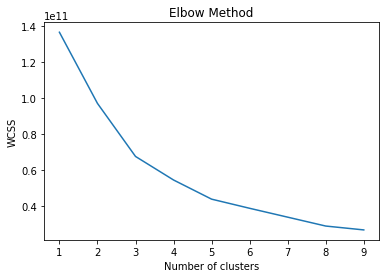

In [47]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [108]:
class A:

    def __init__(self, x):
        self.__x = x

    @property
    def x(self):
        return self.__x

a = A(7)
a.x = 10
print(a.x)

AttributeError: can't set attribute